In [1]:
import numpy as np
import pandas as pd

In [2]:
data_file = r'C:\Users\AnitaM\Downloads\zomato\zomato.csv'

In [3]:
zm = pd.read_csv(data_file)

In [4]:
zm.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
zm.shape

(51717, 17)

In [6]:
zm.drop(['url','phone'], axis=1, inplace=True)

In [7]:
# Analysis points:
# area with high rating restaurant
# type of dish liked most
# area with most online order available
# review analysis with ratings
# feature analysis: feature afecting in the ratings

In [8]:
zm['location'].value_counts()

BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
                         ... 
Yelahanka                   6
West Bangalore              6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [9]:
import seaborn as sns
sns.set(color_codes=True)

import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
zm['rate'].dtypes

dtype('O')

In [11]:
zm['rate'] = zm['rate'].str.replace("/5","")
zm['rate'] = pd.to_numeric(zm['rate'],errors='coerce')

In [12]:
# Rating dist in the location with highest restaurants:

In [13]:
zm_BTM = zm[zm['location']=='BTM'] # BTM loc has the highest restaurants listed

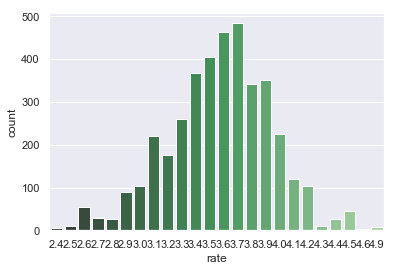

In [14]:
sns.countplot(x='rate', data=zm_BTM,palette="Greens_d")

In [15]:
# most restaurants here have 3.7 rating

In [16]:
zm['rate'].value_counts()

3.9    3972
3.8    3873
3.7    3821
3.6    3316
4.0    3183
4.1    2948
3.5    2784
3.4    2476
3.3    2310
4.2    2184
3.2    1873
4.3    1693
3.1    1561
4.4    1147
3.0    1023
2.9     802
4.5     656
2.8     600
2.7     307
4.6     300
2.6     260
4.7     167
2.5     101
2.4      70
4.8      66
4.9      55
2.3      51
2.2      26
2.1      24
2.0      11
1.8       5
Name: rate, dtype: int64

In [17]:
zm_high_rate = zm.loc[np.where(zm['rate']>=3.5)]

In [18]:
zm_high_rate.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [19]:
# location and rating dist

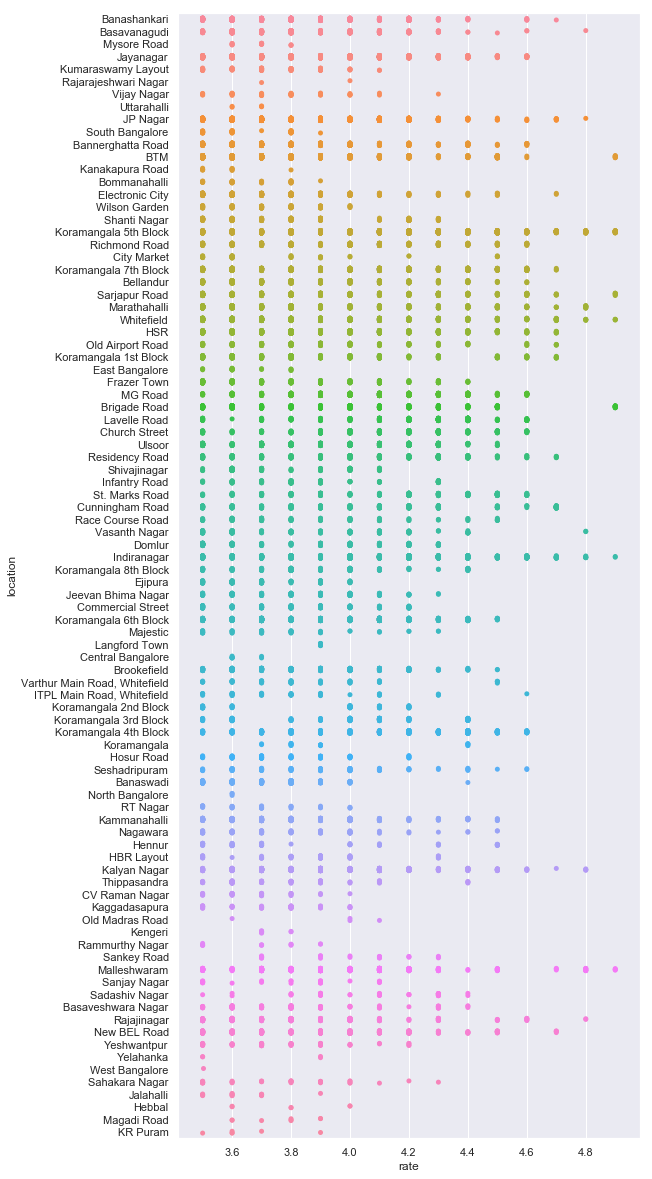

In [20]:
plot = sns.stripplot(x='rate', y='location', data=zm_high_rate,jitter=True)
plot.figure.set_figwidth(8.27)
plot.figure.set_figheight(20.7)

In [21]:
# most of the restaurants fall under 3.7-3.8 rating

In [22]:
zm['dish_liked'].value_counts()

Biryani                                                                                      182
Chicken Biryani                                                                               73
Friendly Staff                                                                                69
Waffles                                                                                       68
Paratha                                                                                       57
                                                                                            ... 
Coffee, Bonda Soup, Masala Dosa, Neer Dosa                                                     1
Panneer Butter Masala, Butter Chicken, Kadhai Paneer, Egg Biryani, Noodles, Chilli Paneer      1
Tiramisu, Cheesecake, Kulfi                                                                    1
Liti Chokha, Chilli Chicken, Pan Fried Momos, Noodles, Chicken Litti, Paratha, Lassi           1
Donne Biryani, Chicken Biryani

In [23]:
# dis_type : text data exploration with word cloud

In [25]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [26]:
zm['dish_liked'].isnull().sum()

28078

In [27]:
zm['dish_liked'].fillna('missing', inplace=True)

In [28]:
zm['dish_liked'].value_counts()

missing                                                                                      28078
Biryani                                                                                        182
Chicken Biryani                                                                                 73
Friendly Staff                                                                                  69
Waffles                                                                                         68
                                                                                             ...  
Coffee, Bonda Soup, Masala Dosa, Neer Dosa                                                       1
Panneer Butter Masala, Butter Chicken, Kadhai Paneer, Egg Biryani, Noodles, Chilli Paneer        1
Tiramisu, Cheesecake, Kulfi                                                                      1
Liti Chokha, Chilli Chicken, Pan Fried Momos, Noodles, Chicken Litti, Paratha, Lassi             1
Donne Biry

In [29]:
text = zm.dish_liked[0]

In [30]:
# create an generate a wordcloud image for one row

In [31]:
wordcloud = WordCloud().generate(text)

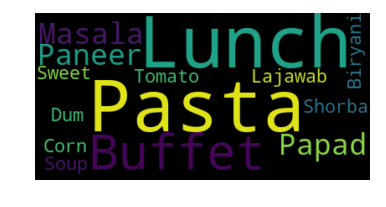

In [32]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

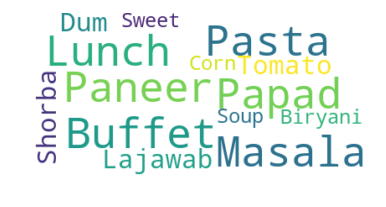

In [33]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [34]:
# it seems like max_font_size here might not be a good idea. 
# It makes it more difficult to see the differences between word frequencies. 
# However, brightening the background makes the cloud easier to read.

In [37]:
# Save the image in the img folder:
wordcloud.to_file("img/first_review.png")

In [38]:
text = " ".join(dish for dish in zm.dish_liked)
print ("There are {} words in the combination of all dish liked.".format(len(text)))

There are 1771213 words in the combination of all dish liked.


In [39]:
stopwords = set(STOPWORDS)

In [40]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color='White').generate(text)

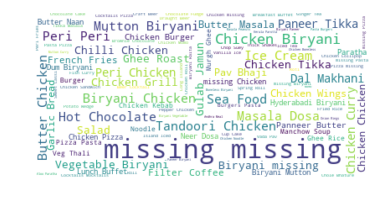

In [41]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [43]:
# updating the stopword with 'missing'
stopwords.update(['missing'])

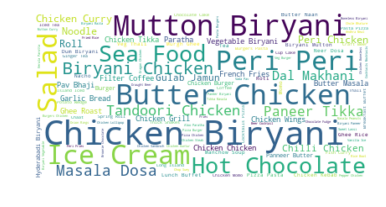

In [44]:
wordcloud = WordCloud(stopwords=stopwords, background_color='White').generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [45]:
# most liked dishes : Mutton Biryani, Butter Chicken, Chicken biryani, sea food, peri peri, salad, ice cream, hot choclate, dosa

In [46]:
# CREATING SHAPE FOR WORDCLOUD:
# To make sure that your mask works, let's take a look at it in the numpy array form:

In [51]:
zomato_img = np.array(Image.open('img/Zomato_img.png'))
zomato_img

array([[[ 3, 15, 11],
        [ 2, 14, 10],
        [ 2, 14, 10],
        ...,
        [ 4, 21, 15],
        [ 3, 20, 14],
        [ 2, 19, 13]],

       [[ 2, 14, 10],
        [ 2, 14, 10],
        [ 1, 13,  9],
        ...,
        [ 3, 20, 14],
        [ 4, 21, 15],
        [ 4, 21, 15]],

       [[ 2, 14, 10],
        [ 1, 13,  9],
        [ 0, 12,  8],
        ...,
        [ 4, 19, 14],
        [ 6, 21, 16],
        [ 7, 22, 17]],

       ...,

       [[ 4, 18, 18],
        [ 4, 18, 18],
        [ 4, 18, 18],
        ...,
        [ 0,  8, 10],
        [ 0,  8, 10],
        [ 0,  8,  7]],

       [[ 4, 18, 18],
        [ 3, 17, 17],
        [ 2, 16, 16],
        ...,
        [ 0,  8, 10],
        [ 0,  8, 10],
        [ 0,  8,  7]],

       [[ 3, 19, 16],
        [ 3, 19, 18],
        [ 3, 19, 18],
        ...,
        [ 0,  9,  8],
        [ 0,  9,  8],
        [ 0,  9,  8]]], dtype=uint8)

In [55]:
# create coloring from image
image_colors = ImageColorGenerator(zomato_img)

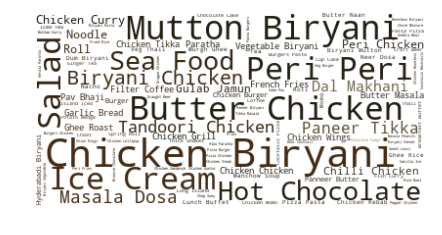

In [56]:
plt.figure(figsize=[7,7])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("img/zomato_bengaluru_restaurant_most_liked_dish.png", format="png")

plt.show()

In [57]:
zm['rest_type'].value_counts()

Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Cafe, Food Court                  2
Bakery, Food Court                2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

In [58]:
# most of the restaurants listed are quick bytes type

In [59]:
zm_BTM['rest_type'].value_counts()

Quick Bites                      2733
Casual Dining                     711
Takeaway, Delivery                334
Cafe                              291
Delivery                          254
Beverage Shop                     193
Dessert Parlor                    112
Bakery                             77
Sweet Shop                         50
Bar                                49
Beverage Shop, Quick Bites         33
Takeaway                           26
Sweet Shop, Quick Bites            26
Casual Dining, Bar                 22
Quick Bites, Beverage Shop         18
Quick Bites, Sweet Shop            18
Mess                               18
Casual Dining, Microbrewery        17
Quick Bites, Dessert Parlor        17
Dessert Parlor, Beverage Shop      17
Cafe, Quick Bites                  16
Cafe, Bakery                       13
Dhaba                              12
Bakery, Quick Bites                11
Pub, Casual Dining                 10
Bar, Casual Dining                  6
Dessert Parl

In [60]:
zm['cuisines'].value_counts()

North Indian                                                        2913
North Indian, Chinese                                               2385
South Indian                                                        1828
Biryani                                                              918
Bakery, Desserts                                                     911
                                                                    ... 
North Indian, Biryani, Charcoal Chicken                                1
French                                                                 1
Bakery, Beverages, Juices                                              1
Asian, Continental, Mediterranean, Salad, American, Biryani            1
Cafe, Healthy Food, North Indian, Biryani, Continental, Desserts       1
Name: cuisines, Length: 2723, dtype: int64

In [63]:
zm['cuisines'].isnull().sum()

45

In [64]:
zm['cuisines'].fillna('missing', inplace=True)

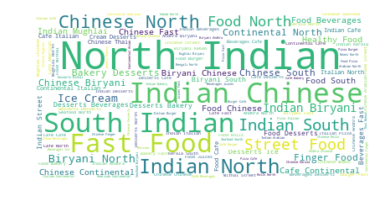

In [65]:
# most listed cuisines
text_cuisines = " ".join(cuisines for cuisines in zm.cuisines)
wordcloud_cuisines = WordCloud(stopwords=stopwords, background_color='White').generate(text_cuisines)
plt.figure()
plt.imshow(wordcloud_cuisines, interpolation='bilinear')
plt.axis("off")
plt.show()